In [154]:
import pandas as pd
import seaborn as sns
from calendar import month_abbr as months
from matplotlib import pyplot as plt
import statsmodels.api as sm

# Atividade 01 - PET

In [155]:
path = 'dados_dengue_pe.parquet'

In [156]:
df = pd.read_parquet(path=path)

In [157]:
df = df[df['DT_NOTIFIC'] < '2021-01-01']
df = df[df['DT_NOTIFIC'] > '2003-01-01']

In [158]:
months = list(months)[1:]

In [159]:
casos_mensais = df.groupby(['Ano', 'Mes']).size().reset_index(name='cases')

C:\Users\Pedro\AppData\Local\Temp\ipykernel_14088\644033358.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')


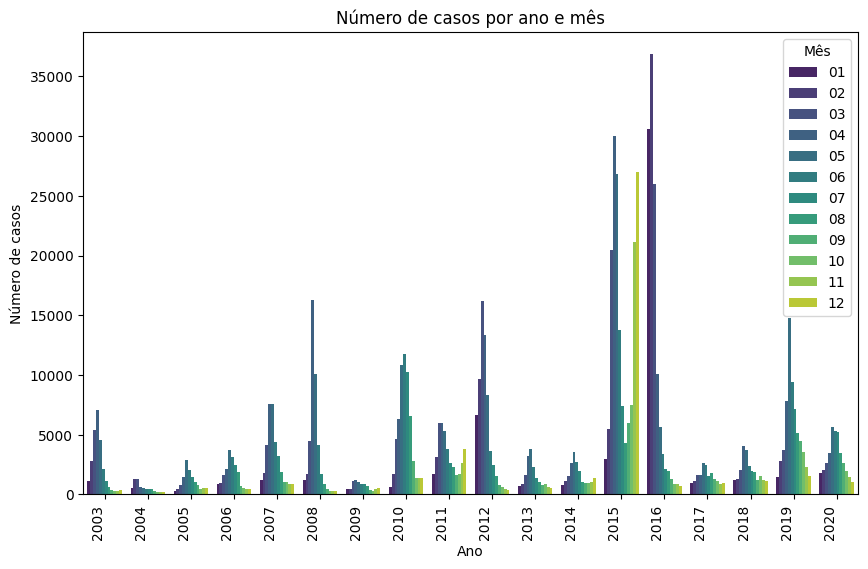

In [160]:
plt.figure(figsize=(10, 6))
my_plot = sns.barplot(data=casos_mensais, x='Ano', y='cases', hue='Mes', palette='viridis')
plt.xlabel('Ano')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.ylabel('Número de casos')
plt.title('Número de casos por ano e mês')
plt.legend(title='Mês')
plt.show()


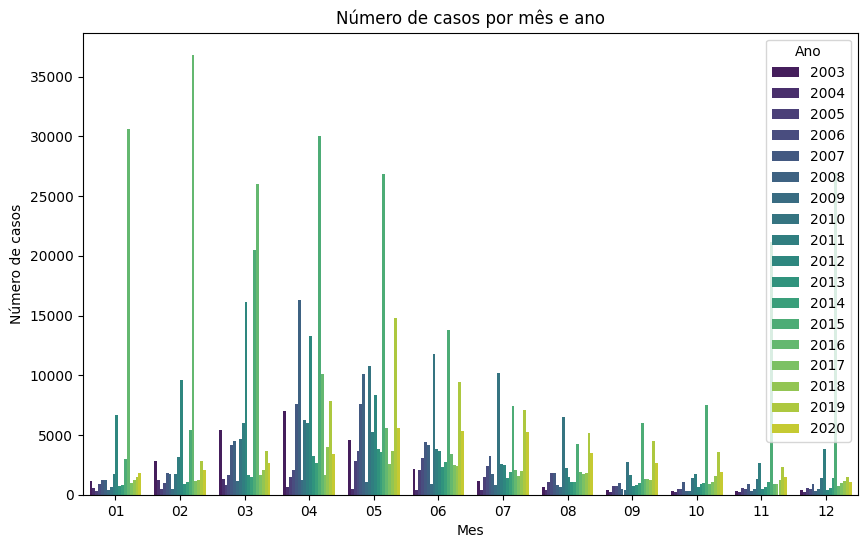

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(data=casos_mensais, x='Mes', y='cases', hue='Ano', palette='viridis')
plt.xlabel('Mes')
plt.ylabel('Número de casos')
plt.title('Número de casos por mês e ano')
plt.legend(title='Ano')
plt.show()


In [162]:
max_casos_mes = casos_mensais.groupby('Ano').apply(lambda x: x.loc[x['cases'].idxmax()])
min_casos_mes = casos_mensais.groupby('Ano').apply(lambda x: x.loc[x['cases'].idxmin()])

print("Meses com maiores números de casos por ano")
print()
print(max_casos_mes[['Mes', 'cases']])
print()
print("Meses com menores números de casos por ano")
print(min_casos_mes[['Mes', 'cases']])

Meses com maiores números de casos por ano

     Mes  cases
Ano            
2003  04   7047
2004  03   1298
2005  05   2849
2006  05   3701
2007  04   7600
2008  04  16288
2009  04   1191
2010  06  11802
2011  04   5991
2012  03  16159
2013  05   3796
2014  05   3557
2015  04  30051
2016  02  36838
2017  05   2604
2018  04   4036
2019  05  14812
2020  05   5610

Meses com menores números de casos por ano
     Mes  cases
Ano            
2003  11    301
2004  10    192
2005  01    331
2006  12    448
2007  11    887
2008  12    275
2009  10    318
2010  01    610
2011  09   1665
2012  12    389
2013  12    532
2014  01    827
2015  01   2951
2016  12    714
2017  11    918
2018  12   1127
2019  01   1480
2020  12   1082


In [163]:
media = casos_mensais['cases'].rolling(window=7, step=2).mean()
desvio = casos_mensais['cases'].rolling(window=7, step=2).std()

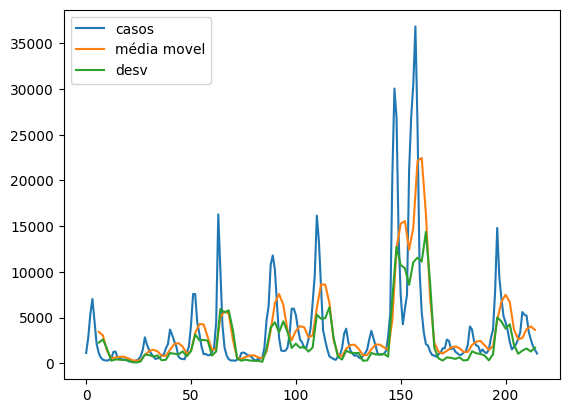

In [164]:
plt.plot(casos_mensais['cases'], label='casos')
plt.plot(media, label='média movel')
plt.plot(desvio, label='desv')
plt.legend(loc='best')
plt.show()

In [165]:
casos_diarios = df.groupby(['Ano', 'Mes', 'DT_NOTIFIC']).size().reset_index(name='cases')

In [166]:
media_diaria = casos_diarios['cases'].rolling(window=30, min_periods=2).mean()
desvio_diario = casos_diarios['cases'].rolling(window=30, min_periods=2).std()

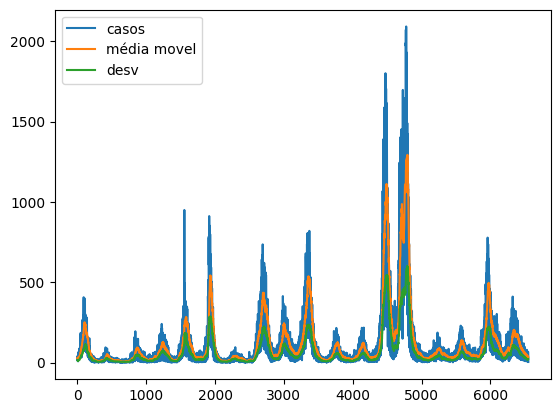

In [167]:
plt.plot(casos_diarios['cases'], label='casos')
plt.plot(media_diaria, label='média movel')
plt.plot(desvio_diario, label='desv')
plt.legend(loc='best')
plt.show()

### Analisando componentes da série temporal

In [168]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [169]:
serie_casos = casos_diarios[['cases', 'DT_NOTIFIC']]
serie_casos['DT_NOTIFIC'] = pd.to_datetime(serie_casos['DT_NOTIFIC'])
serie_casos.set_index('DT_NOTIFIC', inplace=True)

C:\Users\Pedro\AppData\Local\Temp\ipykernel_14088\3638533171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  serie_casos['DT_NOTIFIC'] = pd.to_datetime(serie_casos['DT_NOTIFIC'])


In [170]:
decomp = seasonal_decompose(serie_casos, period=365, model='additive')

Série original

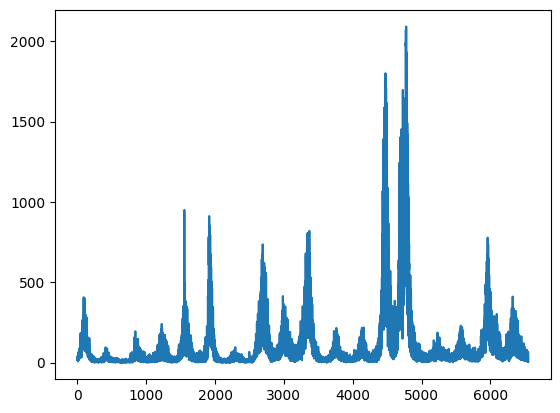

In [171]:
plt.plot(casos_diarios['cases'], label='casos')

Estimação de tendência

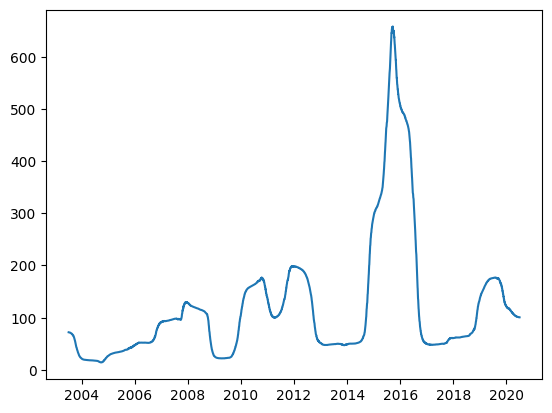

In [172]:
plt.plot(decomp.trend, label='casos')

Estimação da sazonalidade

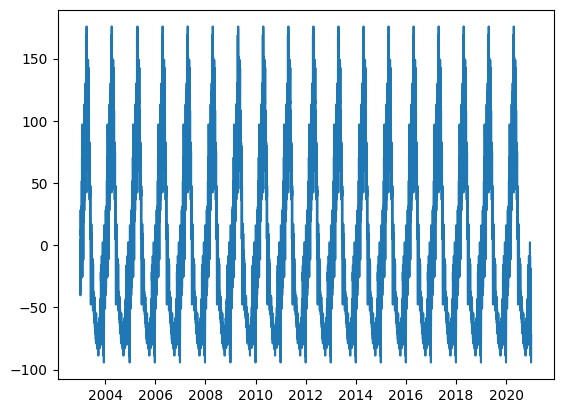

In [173]:
plt.plot(decomp.seasonal, label='casos')

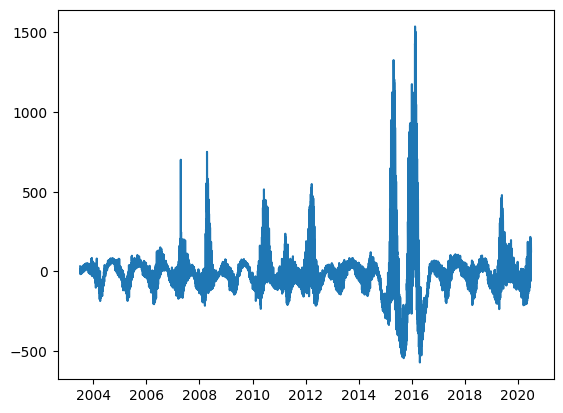

In [174]:
plt.plot(decomp.resid, label='casos')

<Figure size 1500x600 with 0 Axes>

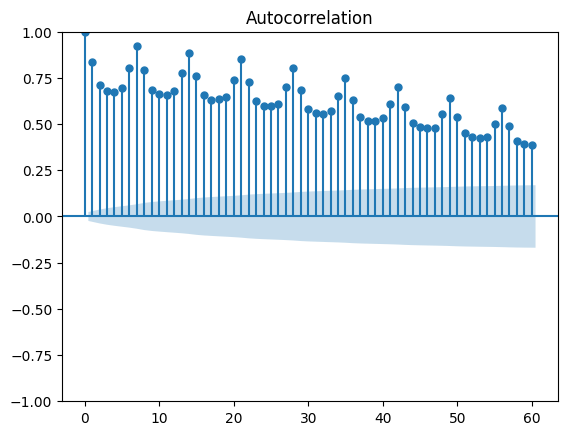

In [184]:
plt.figure(figsize=(15, 6))
sm.graphics.tsa.plot_acf(casos_diarios['cases'], lags=60)
plt.show()

In [176]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(casos_diarios['cases'])

out = pd.Series(adftest[0:4], index=['Teste','p-valor','Lags','Número de observações usadas'])
for key,value in adftest[4].items():
    out['Valor crítico (%s)'%key] = value
print(out)


Teste                          -6.136465e+00
p-valor                         8.164460e-08
Lags                            3.500000e+01
Número de observações usadas    6.516000e+03
Valor crítico (1%)             -3.431354e+00
Valor crítico (5%)             -2.861984e+00
Valor crítico (10%)            -2.567006e+00
dtype: float64
